<a href="https://colab.research.google.com/github/ByakkoHvsc/CatVsDog/blob/main/CatVsDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
... resuming from 814743552 bytes (328148142 bytes left) ...
100% 1.06G/1.06G [00:14<00:00, 24.0MB/s]
100% 1.06G/1.06G [00:15<00:00, 21.8MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [7]:
batch = 16

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size = (256, 256),
    batch_size = batch,
    class_mode = 'binary'
)


validation_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size = (256, 256),
    batch_size = batch,
    class_mode = 'binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
# #generators
# train_ds = keras.utils.image_dataset_from_directory(
#     directory = '/content/train',
#     labels = 'inferred',
#     label_mode = 'int',
#     batch_size = 32,
#     image_size = (256, 256),
# )

# validation_ds = keras.utils.image_dataset_from_directory(
#     directory = '/content/test',
#     labels = 'inferred',
#     label_mode = 'int',
#     batch_size = 32,
#     image_size = (256, 256),
# )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
# #Normalize

# def process(image, label):
#     image = tf.cast(image/255. ,tf.float32)
#     return image,label

# train_ds = train_generator.map(process)
# validation_ds = validation_generator.map(process)

In [8]:
#create CNN Model

model = Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
history = model.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
1250/1250 [==============================] - 345s 268ms/step - loss: 1.4544 - accuracy: 0.5577 - val_loss: 0.6559 - val_accuracy: 0.5784
Epoch 2/10
1250/1250 [==============================] - 328s 262ms/step - loss: 0.6306 - accuracy: 0.6347 - val_loss: 0.6865 - val_accuracy: 0.6750
Epoch 3/10
1250/1250 [==============================] - 327s 261ms/step - loss: 0.5467 - accuracy: 0.7091 - val_loss: 0.5455 - val_accuracy: 0.7190
Epoch 4/10
1250/1250 [==============================] - 331s 265ms/step - loss: 0.4892 - accuracy: 0.7517 - val_loss: 0.4616 - val_accuracy: 0.7870
Epoch 5/10
1250/1250 [==============================] - 335s 268ms/step - loss: 0.4644 - accuracy: 0.7688 - val_loss: 0.4747 - val_accuracy: 0.7796
Epoch 6/10
1250/1250 [==============================] - 333s 267ms/step - loss: 0.4165 - accuracy: 0.7954 - val_loss: 0.4214 - val_accuracy: 0.8192
Epoch 7/10
1250/1250 [==============================] - 331s 265ms/step - loss: 0.3892 - accuracy: 0.8251 - val_

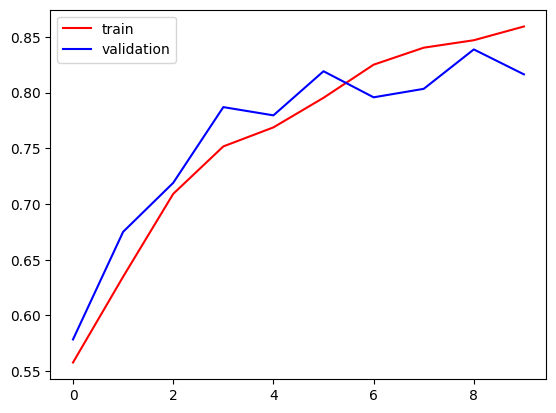

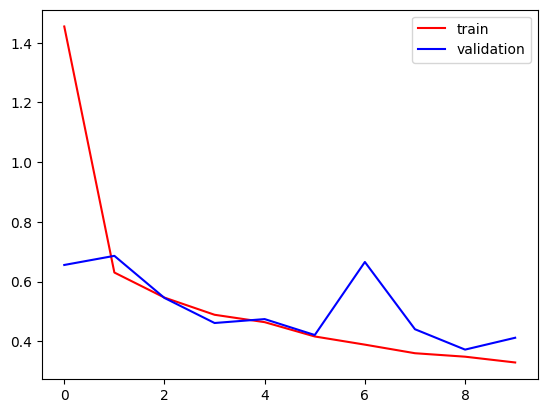

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red',label='train')
plt.plot(history.history['val_accuracy'], color='blue',label='validation')
plt.legend()
plt.show()

plt.plot(history.history['loss'], color='red',label='train')
plt.plot(history.history['val_loss'], color='blue',label='validation')
plt.legend()
plt.show()

In [12]:
import cv2

1/1 [==============================] - 0s 383ms/step


array([[0.]], dtype=float32)

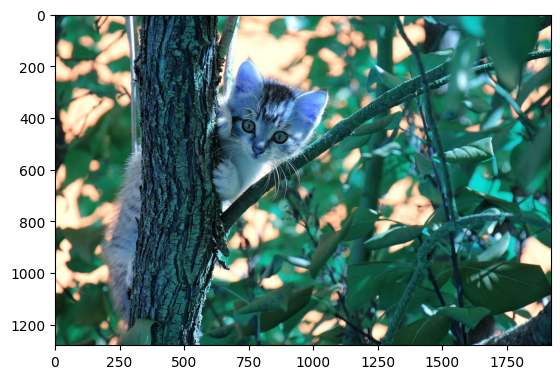

In [14]:
test_image = cv2.imread('/content/cat.jpg')
plt.imshow(test_image)
test_image.shape
test_image = cv2.resize(test_image,(256,256))
test_input = test_image.reshape((1,256,256,3))
model.predict(test_input)


1/1 [==============================] - 0s 32ms/step


array([[0.]], dtype=float32)

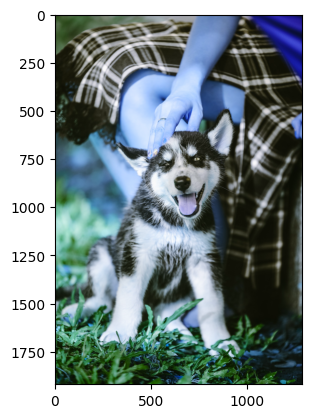

In [15]:
test_image = cv2.imread('/content/dog.jpg')
plt.imshow(test_image)
test_image.shape
test_image = cv2.resize(test_image,(256,256))
test_input = test_image.reshape((1,256,256,3))
model.predict(test_input)
